# **04 - Linear Regression Homework:** 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

## Salaries Dataset:

In [11]:
sal_df = pd.read_csv('LinearReg_Salary.csv')
sal_df.drop(columns = ['Unnamed: 0'], inplace = True)

In [12]:
X_num = sal_df[['YearsExperience']].to_numpy().astype(np.float32)
y_num = sal_df['Salary'].to_numpy().astype(np.float32)

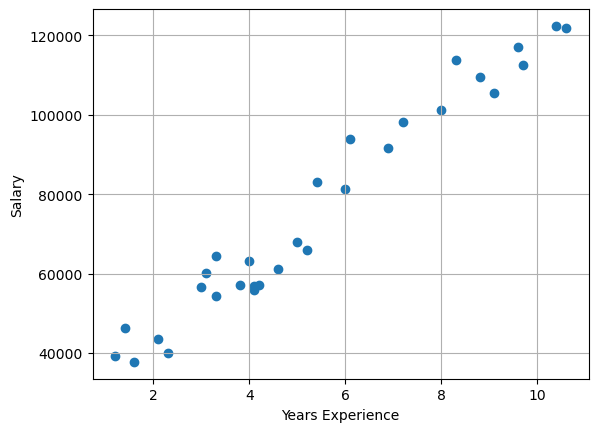

In [13]:
X = torch.from_numpy(X_num)
y = torch.from_numpy(y_num)

y = y.view(y.shape[0], 1)
n_samples, n_features = X.shape

fig = plt.figure()
xv = np.linspace(0, 5, 1000)

plt.grid()
plt.scatter(X, y)
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.show()

In [14]:
model = nn.Linear(n_features, 1)

lr = 0.01
n_epoch = 10

lossfunc = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = lr)  

for epoch in range(n_epoch):
    y_pred = model(X)
    loss = lossfunc(y, y_pred)
    loss.backward()   
    optimizer.step()
    optimizer.zero_grad()
    
    [w, b] = model.parameters()
    print(f' epoch {epoch + 1}: w = {w[0][0]:.3f}, b = {b[0]:.3f}, loss = {loss:.3f}')   

 epoch 1: w = 9700.121, b = 1519.335, loss = 6503424000.000
 epoch 2: w = 12040.295, b = 1958.828, loss = 514644512.000
 epoch 3: w = 12596.977, b = 2136.169, loss = 162132416.000
 epoch 4: w = 12721.520, b = 2249.693, loss = 140592016.000
 epoch 5: w = 12741.388, b = 2347.463, loss = 138493392.000
 epoch 6: w = 12735.933, b = 2441.126, loss = 137543296.000
 epoch 7: w = 12724.384, b = 2533.506, loss = 136667376.000
 epoch 8: w = 12711.399, b = 2625.290, loss = 135802528.000
 epoch 9: w = 12698.109, b = 2716.643, loss = 134945056.000
 epoch 10: w = 12684.788, b = 2807.608, loss = 134094560.000


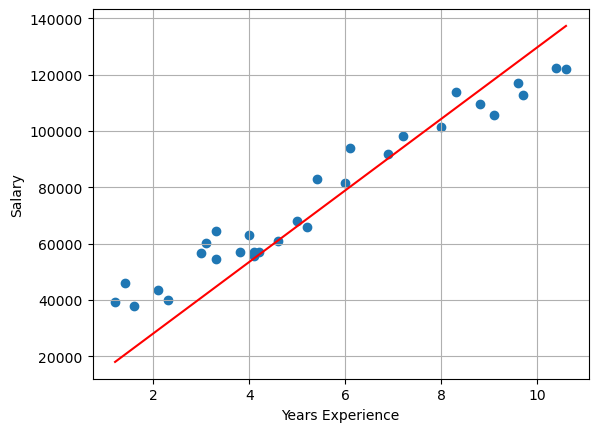

In [15]:
with torch.inference_mode(): 
    y_pred_line = model(X)
    plt.figure()
    plt.scatter(X, y) 
    plt.plot(X, y_pred_line, 'r')
    plt.xlabel('Years Experience')
    plt.ylabel('Salary')
    plt.grid()
    plt.show()

## Germany Regional Precipitation Dataset:

In [16]:
rain = pd.read_csv('Regional_Avg_Rain.csv')
newrain = rain[['Year', 'Germany']].copy() # Just the year and the average monthly precipitation for all of Germany for simplicity

In [17]:
rain_X_num = newrain[['Year']].to_numpy().astype(np.float32) # To tensors
rain_y_num = newrain['Germany'].to_numpy().astype(np.float32)

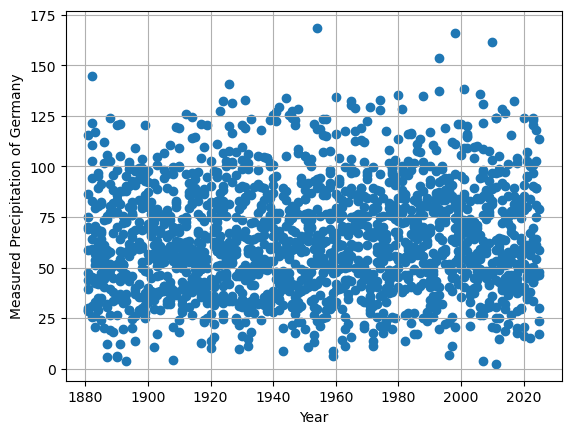

In [21]:
rain_X = torch.from_numpy(rain_X_num)
rain_y = torch.from_numpy(rain_y_num).view(-1, 1)
n_samples, n_features = rain_X.shape

plt.figure()

plt.grid()
plt.scatter(rain_X, rain_y)
plt.xlabel('Year')
plt.ylabel('Measured Precipitation of Germany')
plt.show()

In [22]:
rain_model = nn.Linear(n_features, 1)

lr = 0.0000001 # Learning rate is good???

n_epoch = 10

lossfunc = nn.MSELoss()
optimizer = torch.optim.SGD(rain_model.parameters(), lr = lr)  

for epoch in range(n_epoch):
    rain_y_pred = rain_model(rain_X)
    loss = lossfunc(rain_y, rain_y_pred)
    loss.backward()   
    optimizer.step()
    optimizer.zero_grad()
    
    [w, b] = rain_model.parameters()
    print(f' epoch {epoch + 1}: w = {w[0][0]:.3f}, b = {b[0]:.3f}, loss = {loss:.3f}')   

 epoch 1: w = -0.169, b = 0.659, loss = 2760479.250
 epoch 2: w = -0.015, b = 0.659, loss = 155679.562
 epoch 3: w = 0.021, b = 0.659, loss = 9446.005
 epoch 4: w = 0.030, b = 0.659, loss = 1236.548
 epoch 5: w = 0.032, b = 0.659, loss = 775.664
 epoch 6: w = 0.032, b = 0.659, loss = 749.790
 epoch 7: w = 0.033, b = 0.659, loss = 748.338
 epoch 8: w = 0.033, b = 0.659, loss = 748.256
 epoch 9: w = 0.033, b = 0.659, loss = 748.252
 epoch 10: w = 0.033, b = 0.659, loss = 748.251


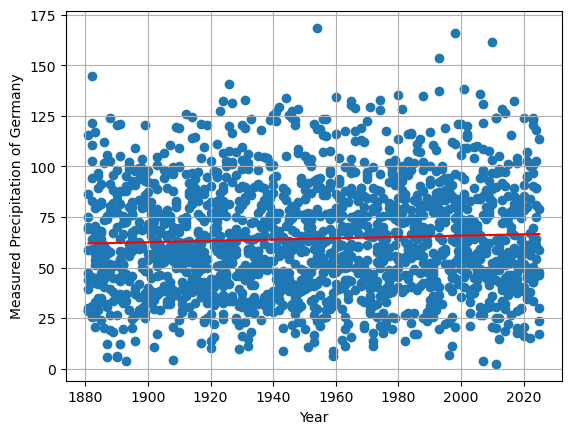

In [23]:
with torch.inference_mode(): 
    rain_y_pred_line = rain_model(rain_X)
    
    plt.figure()
    plt.scatter(rain_X, rain_y) 
    plt.plot(rain_X, rain_y_pred_line, 'r')
    plt.xlabel('Year')
    plt.ylabel('Measured Precipitation of Germany')
    plt.grid()
    plt.show()